<a href="https://colab.research.google.com/github/ristaangdembay/Bootcamp-DA-AI/blob/main/W_9_Day_2_Steps_to_apply_ARIMA_Class_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Collect the Data

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


## Download historical stock price data(APPLE)

In [2]:
ticker = 'AAPL'
data = yf.download(ticker, start = '2015-01-01', end = '2023-10-01')
data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373959,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687307,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689533,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021713,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944681,237458000
...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,175.183578,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.084549,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,169.562317,66921800


In [6]:
# We'll focus on the 'Close Price'
stock_prices = data['Close']
stock_prices

,Close
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
...,...
2023-09-25,176.080002
2023-09-26,171.960007
2023-09-27,170.429993


## Plot the Data

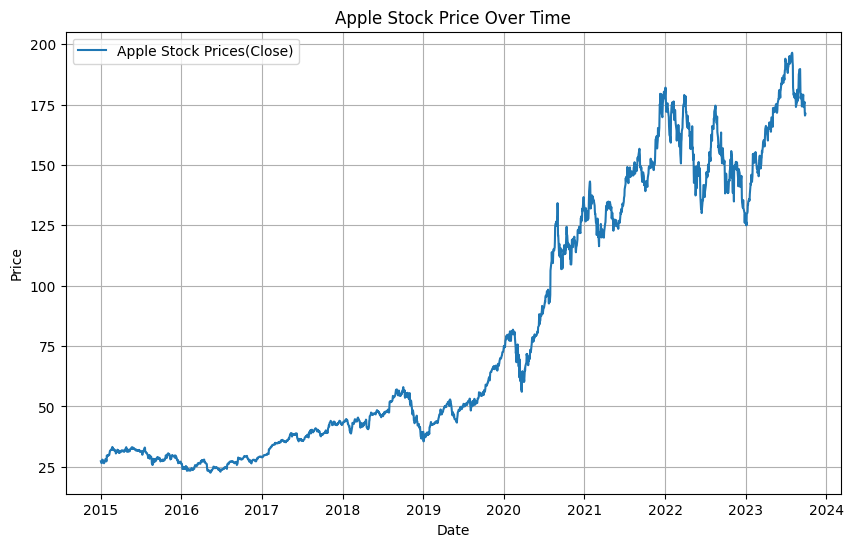

In [4]:
plt.figure(figsize = (10, 6))
plt.plot(stock_prices, label = 'Apple Stock Prices(Close)')
plt.title('Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
type(data)
data['Close'].tolist()

[27.332500457763672,
 26.5625,
 26.565000534057617,
 26.9375,
 27.97249984741211,
 28.002500534057617,
 27.3125,
 27.55500030517578,
 27.450000762939453,
 26.704999923706055,
 26.497499465942383,
 27.18000030517578,
 27.387500762939453,
 28.100000381469727,
 28.2450008392334,
 28.274999618530273,
 27.28499984741211,
 28.827499389648438,
 29.725000381469727,
 29.290000915527344,
 29.657499313354492,
 29.662500381469727,
 29.889999389648438,
 29.985000610351562,
 29.732500076293945,
 29.93000030517578,
 30.5049991607666,
 31.219999313354492,
 31.614999771118164,
 31.770000457763672,
 31.957500457763672,
 32.18000030517578,
 32.11249923706055,
 32.375,
 33.25,
 33.04249954223633,
 32.1974983215332,
 32.60499954223633,
 32.1150016784668,
 32.272499084472656,
 32.34000015258789,
 32.1349983215332,
 31.602500915527344,
 31.649999618530273,
 31.78499984741211,
 31.127500534057617,
 30.559999465942383,
 31.112499237060547,
 30.897499084472656,
 31.237499237060547,
 31.760000228881836,
 32.1175

## 2. Check for Stationarity:
 The ARIMA model assumes the time series is staionary. Use ADF test to check for stationarity and apply differencing if necessary.

In [7]:
from statsmodels.tsa.stattools import adfuller

# Peform Agumented Dicky-Fuller to check stationarity
result = adfuller(stock_prices)

print(f'ADF statistics : {result[0]}')
print(f'p-values : {result[1]}')

if result[1]> 0.05:
  print("The series is not stationary, apply differencing...")
  stock_prices_diff = stock_prices.diff().dropna()
else:
  print("The series is stationary")

ADF statistics : -0.20035612084451776
p-values : 0.9384791554603525
The series is not stationary, apply differencing...


## 3. ACF & PACF:
After Differencing, Check ACF & PACF plots to select the p and q parameter for ARIMA model.

<Figure size 1000x600 with 0 Axes>

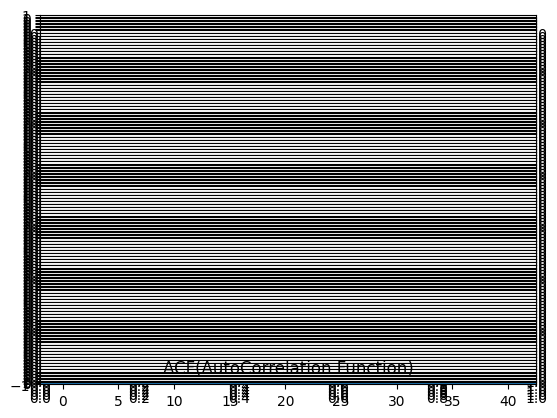

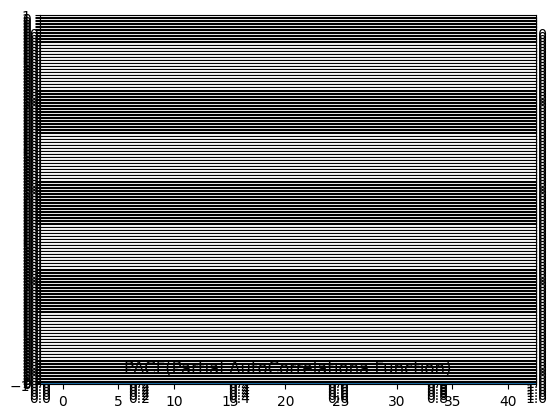

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize = (10, 6))
plt.subplots(121)
plot_acf(stock_prices_diff, lags = 40, ax = plt.gca())
plt.title('ACF(AutoCorrelation Function)')
plt.subplots(122)
plot_pacf(stock_prices_diff, lags = 40, ax = plt.gca())
plt.title('PACF(Partial AutoCorrelationa Function)')
plt.show()

### 4. Fit the ARIMA Model

In [15]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model( with p =1, d = 1, q =1)
model = ARIMA(stock_prices, order = (1,1,1))
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2201
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4443.467
Date:                Tue, 15 Oct 2024   AIC                           8892.933
Time:                        22:53:00   BIC                           8910.022
Sample:                             0   HQIC                          8899.178
                               - 2201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4693      0.203      2.317      0.021       0.072       0.866
ma.L1         -0.5124      0.199     -2.580      0.010      -0.902      -0.123
sigma2         3.3254      0.050     66.585      0.0

### Forecast the next 30 days

In [16]:
forecast = model_fit.forecast(steps = 10)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


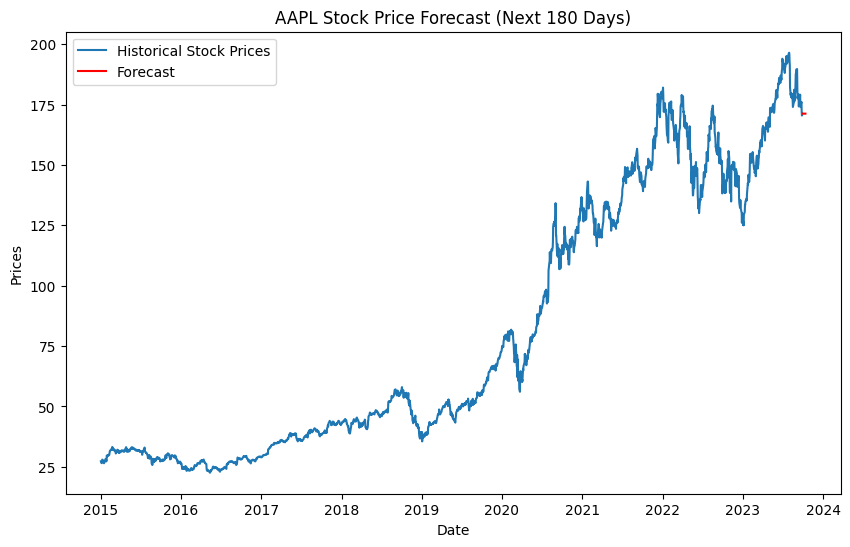

In [18]:
# Plot the forecast
plt.figure(figsize = (10,6))
plt.plot(stock_prices, label = 'Historical Stock Prices')
plt.plot(pd.date_range(start = stock_prices.index[-1], periods = 11, freq = 'B')[1:], forecast, label='Forecast', color='red')
plt.title(f'{ticker} Stock Price Forecast (Next 180 Days)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [20]:
# Assume you have a test set with actual stock prices
test_set = [173.75, 172.399,173.660, 174.9100, 177.490, 178.990, 178.389, 177.490, 178.490, 177.490 ]

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(test_set, forecast))
print(f"RMSE : {rmse:.2f}")

RMSE : 5.56
